In [3]:
# 1. Import Libraries and Load the CSV file ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a professional style for the plots
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Load the dataset using the specific path you provided
# Using 'r' before the string ensures that backslashes are treated as literal characters
file_path = r"C:\Users\Buboy\Downloads\cleaned_merged_data.csv"
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.\n")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please ensure the file exists at the specified path.")
    exit()

Dataset loaded successfully.



In [4]:
# 2. Inspect the data ---
print("--- Initial Data Overview (Head) ---")
print(df.head())
print("\n--- Initial Data Overview (Info) ---")
print(df.info())
print("\n--- Initial Data Overview (Descriptive Statistics) ---")
print(df.describe(include="all"))

--- Initial Data Overview (Head) ---
                             CustomerID   Age         Location IncomeLevel  \
0  0009fdd2-ae63-45ca-8d5b-d0ea98381f7b  21.0      Lake George         Low   
1  000c6bbd-533a-432d-922c-ab64197e71c5  25.0  North Oliviaton        High   
2  00115fc0-f155-42cd-ba68-58aab67b3360  36.0       Nelsonstad         Low   
3  00115fc0-f155-42cd-ba68-58aab67b3360  36.0       Nelsonstad         Low   
4  0047d8ce-a5bb-4db7-860f-6ff66e1cd060  40.0     Mitchellview      Medium   

   SignupDate                         InteractionID InteractionDate  \
0  2020-11-09  26af70c2-acba-461c-95b8-8200de6b154a      2024-02-16   
1  2019-11-06  fff3e62c-3c78-4883-9a34-1d8aad5c1582      2023-07-11   
2  2022-02-16  83975da0-a803-448e-917a-7db7464f8c61             NaN   
3  2022-02-16  83975da0-a803-448e-917a-7db7464f8c61             NaN   
4  2021-11-11  83975da0-a803-448e-917a-7db7464f8c61             NaN   

    Platform InteractionType  Sentiment  ... Gender_Male CustomerID

In [5]:
# 3. Convert 'TransactionDate' column to datetime ---
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [6]:
# 4. Basic time-based features ---
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.day_name()

In [7]:
# 5. Check missing values ---
print("\n--- Missing values per column ---")
print(df.isnull().sum())


--- Missing values per column ---
CustomerID                  0
Age                         0
Location                    0
IncomeLevel                 0
SignupDate                 99
InteractionID               0
InteractionDate          1180
Platform                    0
InteractionType             0
Sentiment                3000
TransactionID               0
TransactionDate            96
Amount                      0
ProductCategory             0
PaymentMethod               0
Gender_Female               0
Gender_Male                 0
CustomerID_label            0
Location_label              0
IncomeLevel_label           0
InteractionID_label         0
Platform_label              0
InteractionType_label       0
TransactionID_label         0
ProductCategory_label       0
PaymentMethod_label         0
TransactionYear            96
TransactionMonth           96
TransactionDayOfWeek       96
dtype: int64



--- Generating Plots ---


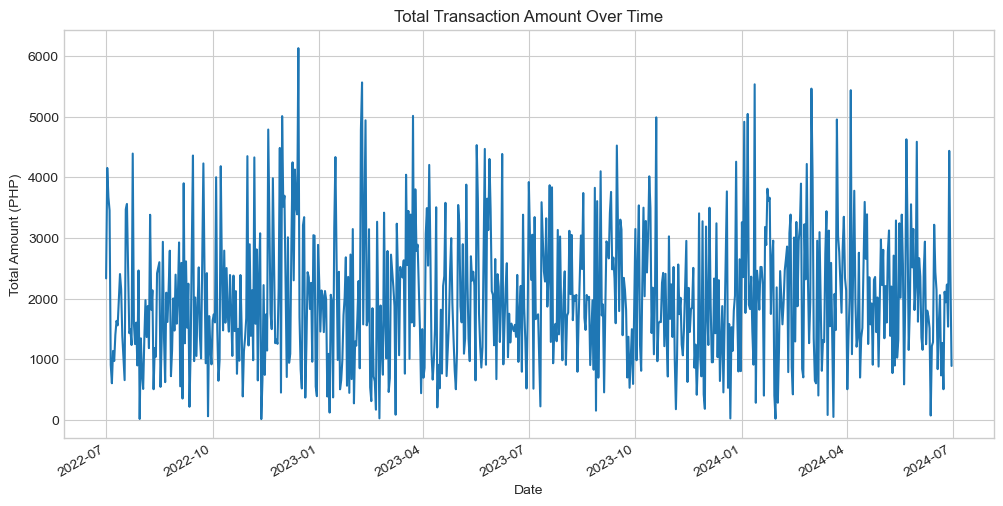

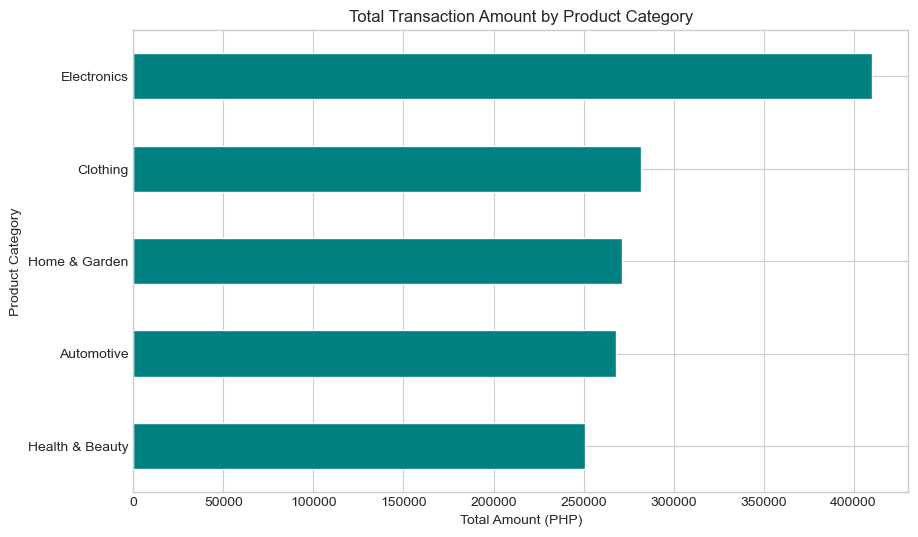

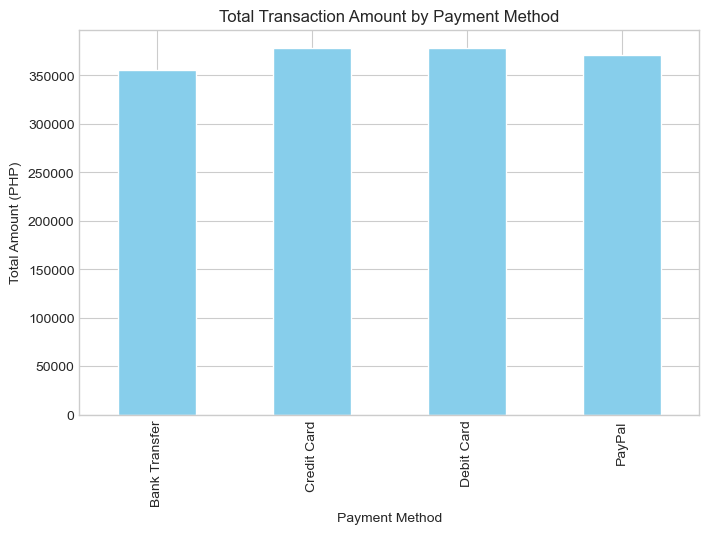

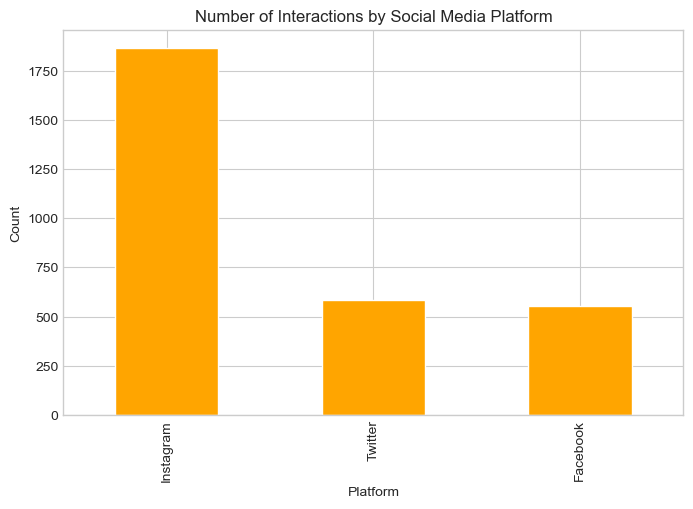

In [8]:
#  6. Basic EDA (Visuals) ---

# Total transaction amount trend over time
print("\n--- Generating Plots ---")
transaction_trend = df.groupby('TransactionDate')['Amount'].sum()

plt.figure(figsize=(12, 6))
transaction_trend.plot()
plt.title("Total Transaction Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Total Amount (PHP)")
plt.grid(True)
plt.show()

# Total transaction amount by product category
plt.figure(figsize=(10, 6))
df.groupby('ProductCategory')['Amount'].sum().sort_values().plot(kind='barh', color='teal')
plt.title("Total Transaction Amount by Product Category")
plt.xlabel("Total Amount (PHP)")
plt.ylabel("Product Category")
plt.show()

# Total transaction amount by payment method
plt.figure(figsize=(8, 5))
df.groupby('PaymentMethod')['Amount'].sum().plot(kind='bar', color="skyblue")
plt.title("Total Transaction Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Amount (PHP)")
plt.show()

# Transaction counts by social media platform
plt.figure(figsize=(8, 5))
df['Platform'].value_counts().plot(kind='bar', color="orange")
plt.title("Number of Interactions by Social Media Platform")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.show()

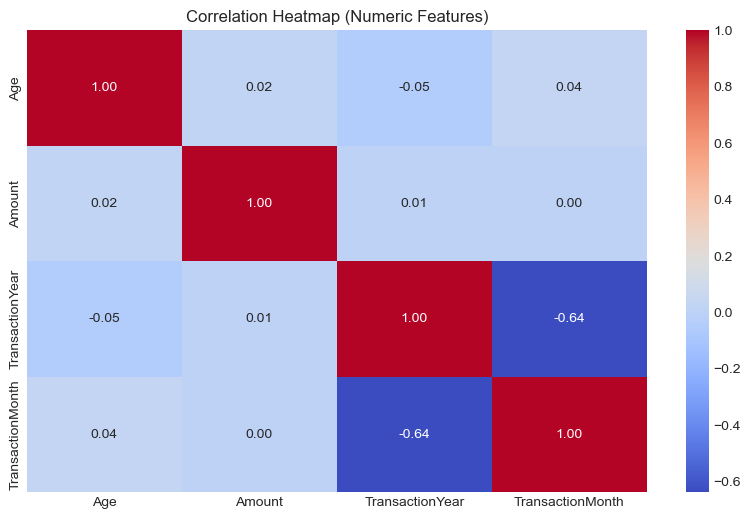

In [9]:
# 7. Correlation Analysis (Numeric Features) ---
# Select numerical columns for correlation analysis
numeric_df = df[['Age', 'Amount', 'TransactionYear', 'TransactionMonth']]
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


--- Generating Categorical Association Matrix ---


C:\Users\Buboy\AppData\Local\Temp\ipykernel_17172\453130935.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Buboy\AppData\Local\Temp\ipykernel_17172\453130935.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Buboy\AppData\Local\Temp\ipykernel_17172\453130935.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Buboy\AppData\Local\Temp\ipykernel_17172\453130935.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Buboy\AppData\Local\Temp\ipykernel_17172\453130935.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\Buboy\AppData\Local\Temp\ipykernel_17172\453130935.py:21: RuntimeW

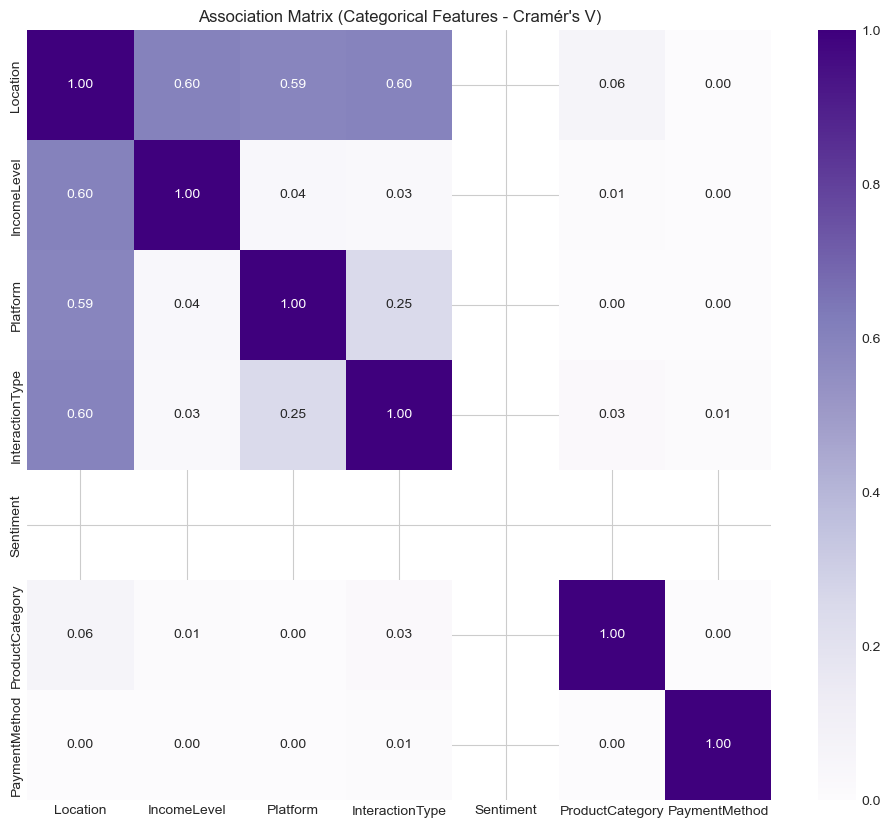


--- EDA Script Execution Complete ---


In [11]:
# 8. Association Analysis (Categorical Features) ---
print("\n--- Generating Categorical Association Matrix ---")
# Select relevant categorical columns for association analysis
categorical_df = df[['Location', 'IncomeLevel', 'Platform', 'InteractionType', 'Sentiment', 'ProductCategory', 'PaymentMethod']]

# Modified Cramér's V function with error handling
def cramers_v(x, y):
    try:
        confusion_matrix = pd.crosstab(x, y)
        # Check if the crosstab has data
        if confusion_matrix.empty or confusion_matrix.size == 0:
            return 0  # Return 0 for no association if data is empty
        
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
        rcorr = r - ((r - 1)**2) / (n - 1)
        kcorr = k - ((k - 1)**2) / (n - 1)
        return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    except Exception as e:
        print(f"Error calculating Cramér's V for columns: {e}")
        return 0  # Return 0 for no association in case of error

# Only proceed if the necessary libraries are installed
try:
    import scipy.stats as ss
    from sklearn.preprocessing import LabelEncoder

    cat_cols = categorical_df.columns.tolist()
    assoc_matrix = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))),
                                index=cat_cols, columns=cat_cols)

    # Check for and handle missing values before calculating associations
    categorical_df = categorical_df.fillna('Unknown')  # Fill NaN values

    for col1 in cat_cols:
        for col2 in cat_cols:
            # Use the dataframe with filled NaN values
            assoc_matrix.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])

    plt.figure(figsize=(12, 10))
    sns.heatmap(assoc_matrix, annot=True, cmap="Purples", fmt=".2f")
    plt.title("Association Matrix (Categorical Features - Cramér's V)")
    plt.show()
except ImportError:
    print("Skipping Cramér's V calculation. Please install `scipy` and `scikit-learn` if you wish to run this section.")

print("\n--- EDA Script Execution Complete ---")